In [29]:
import nltk
import webbrowser
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [30]:
apps_df = pd.read_csv("C:/Users/Ayush Singh/Downloads/google_play_store_data/googleplaystore.csv")
reviews_df = pd.read_csv("C:/Users/Ayush Singh/Downloads/google_play_store_data/googleplaystore_user_reviews.csv")

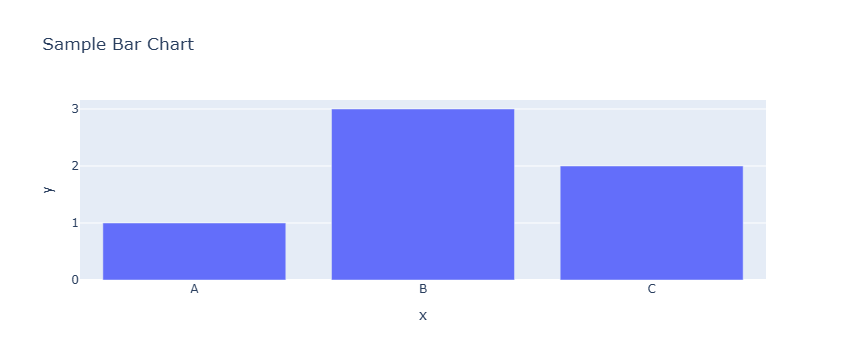

In [31]:
import plotly.express as px
fig=px.bar(x=["A","B","C"],y=[1,3,2],title="Sample Bar Chart")
fig.show()

In [32]:
fig.write_html("interactive_plot.html")

In [48]:
sia = SentimentIntensityAnalyzer()

In [52]:
review = "This app is amazing! I love the new features."
sentiment_score= sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [53]:
review = "This app is vulgur! I hate the new features."
sentiment_score= sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.363, 'neu': 0.637, 'pos': 0.0, 'compound': -0.6114}


In [54]:
reviews_df['Sentiment_Score']=reviews_df['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [55]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
2,10 Best Foods for You,NaN,NaN,NaN,NaN,0.0000
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369


In [33]:
html_files_path="./"
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)

In [34]:
plot_containers=""

In [35]:
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')
    # Append the plot and its insight to plot_containers
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath, full_html=False, include_plotlyjs='inline')

In [36]:
plot_width=400
plot_height=300
plot_bg_color='black'
text_color='white'
title_font={'size':16}
axis_font={'size':12}

In [37]:
#Fig 1

In [38]:
category_counts=apps_df['Category'].value_counts().nlargest(10)
fig1=px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={'x':'Category','y':'Count'},
    title='Top Categories on Play Store',
    color=category_counts.index,
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=400,
    height=300
)
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
save_plot_as_html(fig1,"Category Graph 1.html","The top categories on the Play Store are dominated by tools, entertainment, and productivity apps")
            

In [39]:
#ploty-2

In [40]:
#Fig 2

In [60]:
type_counts=apps_df['Type'].value_counts()
fig2=px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='App Type Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu,
    width=400,
    height=300
)
fig2.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    margin=dict(l=10,r=10,t=30,b=10)
)
save_plot_as_html(fig2,"Type Graph 2.html","Most apps on the Playstore are free, indicating a strategy to attract users first and monetize through ads or in app purchases")

In [42]:
#Fig 3

In [61]:
fig3=px.histogram(
    apps_df,
    x='Rating',
    nbins=20,
    title='Rating Distribution',
    color_discrete_sequence=['#636EFA'],
    width=400,
    height=300
)
fig3.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
save_plot_as_html(fig3,"Rating Graph 3.html","Ratings are skewed towards higher values, suggesting that most apps are rated favorably by users")

In [44]:
#Fig 4

In [62]:
sentiment_counts=reviews_df['Sentiment_Score'].value_counts()
fig4=px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x':'Sentiment Score','y':'Count'},
    title='Sentiment Distribution',
    color=sentiment_counts.index,
    color_discrete_sequence=px.colors.sequential.RdPu,
    width=400,
    height=300
)
fig4.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
save_plot_as_html(fig4,"Sentiment Graph 4.html","Sentiments in reviews show a mix of positive and negative feedback, with a slight lean towards positive sentiments")

In [63]:
#Fig 5 is on previous page (Project Training-2)

In [64]:
#Fig 6 is on previous page (Project Training-2)